In [ ]:
# part-1

In [ ]:
# question 1

In [ ]:
# Regularization in deep learning is a technique used to prevent overfitting and improve the generalization of neural networks. It involves adding a regularization term to the loss function, which penalizes large weights or complex model architectures.

In [ ]:
# question 2

In [ ]:
# Regularization will help select a midpoint between the first scenario of high bias and the later scenario of high variance. This ideal goal of generalization in terms of bias and variance is a low bias and a low variance which is near impossible or difficult to achieve. Hence, the need of the trade-off.

In [ ]:
# question 3

In [ ]:
# L1 Regularization, also called a lasso regression, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function. L2 Regularization, also called a ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

In [ ]:
# question 4

In [ ]:
# Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.

In [ ]:
# part-2

In [ ]:
# question-5

In [ ]:
# Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.“dropout” refers to the practice of disregarding certain nodes in a layer at random during training. A dropout is a regularization approach that prevents overfitting by ensuring that no units are codependent with one another.

In [ ]:
# question 6

In [ ]:
# In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.In Regularization by Early Stopping, we stop training the model when the performance of the model on the validation set is getting worse-increasing loss or decreasing accuracy or poorer values of the scoring metric.

In [ ]:
# question 7

In [ ]:
# Batch normalization is a technique that helps neural networks train faster and more stably by reducing the internal covariate shift. This means that the distribution of the inputs to each layer of the network does not change significantly during training, which can cause problems for gradient-based optimization.

In [ ]:
# question 8

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras

In [3]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.13.0
Keras Version 2.13.1


In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.


In [14]:
from keras.layers import Dense,Flatten,Dropout
model=tf.keras.models.Sequential()

In [15]:
Model=tf.keras.models.Sequential()

In [16]:
model.add(Flatten(input_shape=[28,28],name='iplayer'))
model.add(Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))

model.add(Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))

model.add(Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))

model.add(Dense(units=10,activation='softmax'))

In [17]:
Model.add(Flatten(input_shape=[28,28],name='iplayer'))
Model.add(Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
Model.add(Dropout(0.2))
Model.add(Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
Model.add(Dropout(0.1))
Model.add(Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
Model.add(Dropout(0.2))
Model.add(Dense(units=10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 iplayer (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 iplayer (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               

In [20]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

Model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [22]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/5
1719/1719 [==============================] - 11s 3ms/step - loss: 0.8062 - accuracy: 0.7579 - val_loss: 0.3362 - val_accuracy: 0.9070
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3098 - accuracy: 0.9113 - val_loss: 0.2549 - val_accuracy: 0.9294
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2451 - accuracy: 0.9289 - val_loss: 0.2062 - val_accuracy: 0.9412
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2018 - accuracy: 0.9412 - val_loss: 0.1822 - val_accuracy: 0.9498
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1720 - accuracy: 0.9496 - val_loss: 0.1678 - val_accuracy: 0.9518


In [24]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

History = Model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3869 - accuracy: 0.8882 - val_loss: 0.1887 - val_accuracy: 0.9510
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3726 - accuracy: 0.8924 - val_loss: 0.1784 - val_accuracy: 0.9524
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3423 - accuracy: 0.9038 - val_loss: 0.1654 - val_accuracy: 0.9538
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3271 - accuracy: 0.9075 - val_loss: 0.1587 - val_accuracy: 0.9578
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3083 - accuracy: 0.9130 - val_loss: 0.1525 - val_accuracy: 0.9600


In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.273854,0.571127,0.459081,0.8870
1,0.674374,0.788873,0.314819,0.9162
2,0.538513,0.838345,0.257769,0.9298
3,0.466209,0.862327,0.227573,0.9394
4,0.429592,0.876055,0.210914,0.9450


In [26]:
pd.DataFrame(History.history)

,loss,accuracy,val_loss,val_accuracy
0,0.386857,0.888236,0.188694,0.9510
1,0.372622,0.892382,0.178415,0.9524
2,0.342284,0.903782,0.165359,0.9538
3,0.327052,0.907473,0.158662,0.9578
4,0.308290,0.913000,0.152545,0.9600


<Axes: >

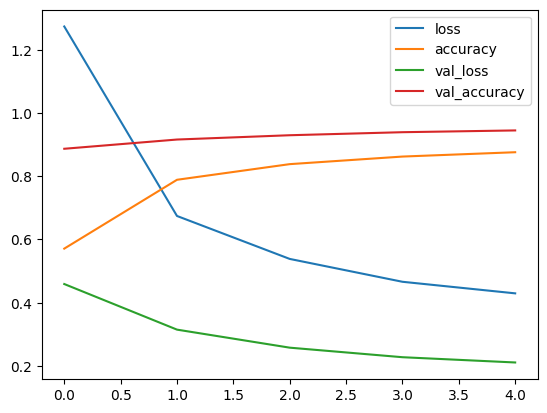

In [27]:
pd.DataFrame(history.history).plot()

<Axes: >

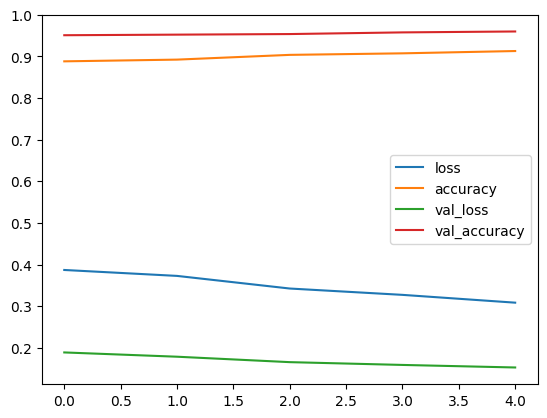

In [28]:
pd.DataFrame(History.history).plot()

In [ ]:
# question 9

In [ ]:
# Dropout:

# Considerations: Randomly drops a fraction of neurons during training, making the model more robust.
# Trade-offs: Can slow down training and may require larger networks. It might also be difficult to interpret the importance of individual neurons.

# Batch Normalization:

# Considerations: Normalizes activations within mini-batches to reduce internal covariate shift, improving training stability.
# Trade-offs: Introduces additional parameters and computations. Not always suitable for recurrent neural networks (RNNs).# #